# CAO Points Analysis

[CAO](http://www.cao.ie/index.php?page=points&p=2021)

***

# Introduction

This repository contains all of the files pertaining to my 2021 project submission for the Fundementals of Data Analysis module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of a 15 week period from September to December 2021. This Jupyter notebook contains the complete documentation for the project on the round 1 CAO points analysis for 2019-2021.



### 1.1 Project objective

This project has multiple objectives - it required me to collect, clean, analyse and discuss the CAO points and trends for the last 3 years.   
The problem statement for the assignment is as follows :

- To give clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame, pitched at my classmates.
- Display a detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.
- Display appropriate plots and other visualisations to enhance your notebook for viewers.

Although the 3 aims of the project are clear - I would say that a huge amount of time was spent scraping and cleaning up the data for it to be in the correct condition for analysis. This was challanging and got extremly frustrating at times, however I learned alot, and as with most investigations and research, sometimes I was left with more questions than answers.  
One thing I would like to gain more expierence on and learn more about is data types and what is the best condition to have your data in for analysis - I spent alot of time trying to research why my code would effect the data in one column different to the data in another column, even though they were the same type. This happened both in the "cleaning" of the data and during analysis. 

When I moved on to the analysis I also found that trying to spot unusual trends was difficult as I was a little unequipped because of my limited expierence doing detailed analysis. I found that I was going down rabbit hole after rabbit hole and coming back with little to no value at times. I used the few tools on pandas such as the ```.describe()``` function and some basic plots to try and give myself a little more insight. I do believe that some of these more intuitive analytical tools will only come with time and expierence - the more datasets I am exposed to and analyse the better I will be at choosing what tools and trends are likly to be useful. For this project I will say there was a bit of "well I will throw all these analytical ideas at the wall that I have found on google and see what sticks", unfortunatly not much in this case as google is kinda big.

#### Importing Libaries
Next I will import the packages I used in the creation of this notebook

In [1]:
# Data Frames
import pandas as pd


# Read in PDF
import requests, PyPDF2

# Regular Expressions
import re

# Convenient HTTP Requests.
import requests as rq

# dates and times
import datetime as dt

# For downloading
import urllib.request as urlrq

# For Comparison
import datacompy

# Numerical Arrays
import numpy as np

# Cooler plots
import seaborn as sns

import matplotlib.pyplot as plt

#### Date and Time for saving data
This is an easy way for keeping a recorded timestamp of when the file with the scraped data was collected.

In [2]:
# Get Current date and time.
now = dt.datetime.now()

# Format as string
nowstr = now.strftime('%Y%m%d_%H%M%S')

# 2021 Points

First we will look at scraping the 2021 points data from the CAO website.

#### Save original data set

In [3]:
# Fetch CAO points URL
resp = rq.get('http://www2.cao.ie/points/l8.php')
# Have a quick peek - Response [200] is good
resp

<Response [200]>

In [4]:
#Create file path for original data
pathhtml = 'data/cao2021_'+ nowstr + '.html'

##### Error on Server
- Server says we should decode as per:
    Content-Type: text/html; charset=iso-8859-1
- However one line uses \x96 which is not defined in iso-8859-1
- Therefore we used the similar decoding standard cp1252
- This is very similar but includes \x96

In [5]:
# Server uses the incorrect encoding
original_encoding = resp.encoding
# Change to cp1252
resp.encoding = 'cp1252'

In [6]:
# Save The orginal html file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [7]:
# Quick Check to confirm encoding
resp.encoding

'cp1252'

### Use regular Expressions to select the lines we want
Regular expressions \ (or reg ex)are specially encoded text strings used as patterns for matching sets of strings. [Oreilly](https://www.oreilly.com/library/view/introducing-regular-expressions/9781449338879/ch01.html)  
In this case we will be using reg ex to only bring in the data we require from the 2021 dataset.

In [8]:
# Compile Reg-Ex for Matching lines

re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

In [9]:
# File path for csv file
path2021 = 'data/cao2021_csv_'+ nowstr + '.csv'

The next piece of code here was adapted (copied) from the lecture videos. Honestly, if I to do what was done below only using python, there is a chance I would still be stuck here in the project....or I would have just done it manually in Excel.  
This was really informative and eyeopening as to how data is actually cleaned down.

In [10]:

# Keep track of how many courses we process.
no_lines = 0

# Open CSV file for writing 
with open (path2021, 'w') as f:
    # Write a header row
    f.write(','.join(['Code', 'Title', 'PointsRD1', 'PointsRD2']) + '\n')
    # loop through lines of the response
    for line in resp.iter_lines():
        #decode the line using 'cp1252' - wrong encoding
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code
            course_code = dline[:5]
            #print (course_code)
            # course title
            course_title = dline[7:57].strip()
            #print (course_title)
            # Round one points
            course_points = re.split(' +', dline[60:])
            if len(course_points) !=2:
                course_points = course_points[ :2]
            # join the fields using a comma
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


<br>

**NB:** it was verified as of 31/12/2021 that there were 949 courses exactly in the cao2021 points list

In [11]:
# Create dataframe for 2021 points
df2021 = pd.read_csv(path2021)

In [15]:
# Have a look at top and bottom of df
df2021

,Code,Title,PointsRD1,PointsRD2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [16]:
# Removes special characters from column in df2021
df2021['PointsRD1'] = df2021['PointsRD1'].str.replace(r'\W',"")

<ipython-input-16-509278d39f1f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2021['PointsRD1'] = df2021['PointsRD1'].str.replace(r'\W',"")


<br>

# 2020 CAO Points

Now we will look at scraping the 2020 points data from the CAO website - however this time they gave it to us in xlsx format so we read it in a little differently.

In [18]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [19]:
#Create file path for original data
pathxlsx = 'data/cao2020_'+ nowstr + '.xlsx'

In [20]:
# Save original file to disk
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211231_133400.xlsx',
 <http.client.HTTPMessage at 0x153c83f4e50>)

<br> 

## Load Spreadsheet using Pandas

In [21]:
# Download and parse the excel spreadsheet
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows = 10)

In [23]:
# Have a look at the download
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see there is a lot of data here that is not real data such as all the empty columns at the end of the df.

In [24]:
# Spot Check Random Row
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [25]:
# Spot Check End of Data
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [26]:
#Create file path for PANDAS data
path = 'data/cao2020_'+ nowstr + '.csv'

In [27]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When cleaning the data here I could not seem to get rid of the some of the strings and special characters without corrupting the data in the 'R1 POINTS' column. I tried lots of different ways but the data kept returning with the string gone but the points totals I wanted gone too, or there was simply no change to other columns. 
The ways i tried included :
 - ```.str.replace('#+matric', '')```  
 - ```.map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))```  
 - ```df[cols_to_check] = df[cols_to_check].replace({';':''}, regex=True)```
 
 I spent a huge amount of time here trying to resolve this and had no sucess. I was extremly frustrated at this point and time was speeding by so I decided to leave it here for the moment and come back to it when I got to rest of the data together as I may run into this problem again in the 2019 and it would be as easy to do the research for the entire data set when it was put together.

In [28]:
# Save pandas data frame to disk
df2020.to_csv(path)

## 2019 Points

http://www2.cao.ie/points/lvl8_19.pdf

Once again here this part of the notebook was done by following on the lecture videos.

##### Steps to reproduce the 2019 data

 - Download orginal PDF
 - Open Original pdf in Microsoft Word
 - Save Microsoft Words Coverted PDF
 - Re save version in word for editing
 - Delete Headers and footers
 - Delete intro on page 1
 - Select All and copy
 - Paste into notepad++
 - Remove HEI name headings and paste into each course line
 - Delete Blank Lines
 - Replace Double Tab Characters with Single Tab
 - Deleted all tab characters at end 
 - Replace all backticks with commas

In [32]:
df2019 = pd.read_csv('data/2019POINTS_20211104103000_edited.csv', sep= '\t')

In [33]:
df2019

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [34]:
# Removes Special Characters
df2019['EOS'] = df2019['EOS'].str.replace(r'\W',"")

<ipython-input-34-06bc442524b1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2019['EOS'] = df2019['EOS'].str.replace(r'\W',"")


In [35]:
# Create a file path for the pandas data.
path2019 = 'data/cao2019_' + nowstr + '.csv'

In [36]:
# Save pandas data frame to disk.
df2019.to_csv(path2019)

# Quick look at the 3 data frames

Here is a quick look at the first five rows of the 3 dataframes.  
I can see from this the columns we need to include/exclude, rename etc.  
I will have to do a little more clean up for the NaN values and special characters when this is done.


In [40]:
# Dataframe for 2021
df2021.head()

,Code,Title,PointsRD1,PointsRD2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN


2021 data looks ok from here but will have to do some closer inspection after joining the data together

In [41]:
# Dataframe for 2020
df2020.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the R1 POINTS column that interests me there is still some spurios data such as the  '#+matric' values - these will be addressed when the dataframs are joined.

In [42]:
# Dataframe for 2019
df2019.head()

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0


2019 data looks ok from here but will have to do some closer inspection after joining the data together

<br>

## Concatonate and Join

<br>

Concatonate and Join the 2021, 2020 and 2019 dataframes.

In [43]:
courses2021 = df2021[['Code', 'Title']]
courses2021

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [44]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['Code', 'Title']
courses2020

,Code,Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [45]:
courses2019 = df2019[['Course Code','Course']]
courses2019.columns = ['Code', 'Title']
courses2019

,Code,Title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [46]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [47]:
allcourses.sort_values('Code')

,Code,Title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [48]:
# finds all extra copies of duplicated rolls
allcourses[allcourses.duplicated()]

,Code,Title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [49]:
#Copy of the combo of 2021, 2020 and 2019 data frame with the duplicates removed
allcourses.drop_duplicates()

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3281,TL801,Animation Visual Effects and Motion Design
3282,TL802,"TV, Radio and New Media"
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


In [50]:
# finds all extra copies of duplicated rolls
# based only on 'Code' column
allcourses[allcourses.duplicated(subset=['Code'])]

,Code,Title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [51]:
#Copy of the combo of 2021,2020 and 2019 data frame with the duplicates removed
# based only on 'Code' column
allcourses.drop_duplicates(subset = ['Code'], inplace = True, ignore_index=True )

In [52]:
allcourses.head()

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying


<br>

### Join the Points

In [53]:
# Set the index to the code column.
df2021.set_index('Code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [54]:
# Set the index to the code column.
allcourses.set_index('Code', inplace=True)

In [55]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,Title,points_r1_2021
Code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [56]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [57]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [58]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,Title,points_r1_2021,points_r1_2020
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [59]:
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [60]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [61]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,Title,points_r1_2021,points_r1_2020,points_r1_2019
Code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


Here I exported the dataframe out to excel to clean some of the data manually as it was faster and cleaner.  
I seemed to currupt and delete data when I tried to do it on all the points columns in the dataframe at the same time or when I tried to do it column by column.

In [63]:
allcourses.to_csv('ForExFix.csv')

At this point I exported the data to csv to have al look at how my data was looking. I spent an inordinate amount of time looking to see how to remove the special characters and the text from the dataframe and in the end realised it was far quicker to manipulate the data manually in excel using the find/replace function. Steps in Excel:

 - Find and replace: # with ''
 - Find and replace: mat with '' (in 2019 column only)
 - Find and replace: +matric with ''
 - Save file as ForExFix_comp.csv

In [64]:
# Read in cleaned data
firstrndpts = pd.read_csv('ForExFix_comp.csv')

In [65]:
# See first five rows 
firstrndpts.head()

,Code,Title,points_r1_2021,points_r1_2020,points_r1_2019
0,AL801,Software Design for Virtual Reality and Gaming,300.0,303.0,304.0
1,AL802,Software Design in Artificial Intelligence for...,313.0,332.0,301.0
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,337.0,309.0
3,AL805,Computer Engineering for Network Infrastructure,321.0,333.0,329.0
4,AL810,Quantity Surveying,328.0,319.0,307.0


This looks good although I would like them to be integers rather than floats.

In [66]:
# See last five rows 
firstrndpts.tail()

,Code,Title,points_r1_2021,points_r1_2020,points_r1_2019
1646,SG441,Environmental Science,NaN,NaN,297.0
1647,SG446,Applied Archaeology,NaN,NaN,289.0
1648,TL803,Music Technology,NaN,NaN,264.0
1649,TL812,Computing with Digital Media,NaN,NaN,369.0
1650,WD148,Tourism Marketing,NaN,NaN,269.0


From the last five rows I can see that there are now NaN values in the empty cells - this would be an issue during analysis so I will change these values to 0 using the ```.fillna()``` function.

In [67]:
# Replace NaN with 0
firstrndpts.fillna(0, inplace=True)

In [69]:
# Check to see if NaNs are repelaced
firstrndpts.tail()

,Code,Title,points_r1_2021,points_r1_2020,points_r1_2019
1646,SG441,Environmental Science,0.0,0.0,297.0
1647,SG446,Applied Archaeology,0.0,0.0,289.0
1648,TL803,Music Technology,0.0,0.0,264.0
1649,TL812,Computing with Digital Media,0.0,0.0,369.0
1650,WD148,Tourism Marketing,0.0,0.0,269.0


In [70]:
# Change values to integers in points columns
firstrndpts = firstrndpts.astype({"points_r1_2021": ('int64'), 
                                              "points_r1_2020": ('int64'),
                                              "points_r1_2019": ('int64')})

In [71]:
# Set the Course Code as the index as I know they are unique
firstrndpts.set_index('Code', inplace=True)

In [72]:
# checking the data types
firstrndpts.dtypes

Title             object
points_r1_2021     int64
points_r1_2020     int64
points_r1_2019     int64
dtype: object

In [73]:
firstrndpts.tail()

,Title,points_r1_2021,points_r1_2020,points_r1_2019
Code,,,,
SG441,Environmental Science,0,0,297
SG446,Applied Archaeology,0,0,289
TL803,Music Technology,0,0,264
TL812,Computing with Digital Media,0,0,369
WD148,Tourism Marketing,0,0,269


# Analysis
Now I have the data in the way I want I can finally begin the analysis.  

However before beginning the analysis please remember about the points system is that the points required does not reflect the difficulty of the course, it is the popularity of the course - how many people applied. Although many of the high-points courses do tend to be among the toughest, the two aren’t directly linked.

First I am going to use the describe function to give me some information about the points columns. It is improtant to remember here that not all courses were run over the 3 years so min value will be 0 in all 3 columns which is not really true as the 0 values most likely indicate that the course was not run that year. Also the 0 values will throw off the mean and standard diviations - however once this is understood there is no harm in having a look incase anything else jumps out.

In [75]:
# Describe each of the points columns
firstrndpts.describe()

,points_r1_2021,points_r1_2020,points_r1_2019
count,1651.000000,1651.000000,1651.000000
mean,227.907935,296.358571,205.757723
std,224.164388,177.368286,207.976644
min,0.000000,0.000000,0.000000
25%,0.000000,214.000000,0.000000
50%,265.000000,299.000000,251.000000
75%,413.500000,410.000000,360.500000
max,1028.000000,1088.000000,979.000000


In [145]:
# Creating variables for each years points data - excluding the 0 values
x = firstrndpts['points_r1_2021'][firstrndpts['points_r1_2021'] > 1.0 ]
y = firstrndpts['points_r1_2020'][firstrndpts['points_r1_2020'] > 1.0 ]
z = firstrndpts['points_r1_2019'][firstrndpts['points_r1_2019'] > 1.0 ]

In [146]:

print('Breakdown of the 2019 points data:')
z.describe()

Breakdown of the 2019 points data:


count    906.000000
mean     374.951435
std      123.902697
min       55.000000
25%      290.000000
50%      348.000000
75%      440.000000
max      979.000000
Name: points_r1_2019, dtype: float64

In [147]:
print('Breakdown of the 2020 points data:')
y.describe()

Breakdown of the 2020 points data:


count    1394.000000
mean      350.995696
std       134.433752
min        55.000000
25%       252.250000
50%       316.500000
75%       433.000000
max      1088.000000
Name: points_r1_2020, dtype: float64

In [148]:
print('Breakdown of the 2021 points data:')
x.describe()

Breakdown of the 2021 points data:


count     923.000000
mean      407.666306
std       128.706224
min        57.000000
25%       303.000000
50%       391.000000
75%       499.000000
max      1028.000000
Name: points_r1_2021, dtype: float64

I have now created the variables for all years points data seperatly and excluded the 0 values.  

The one thing that jumps out at me immediatly looking at the data brakedowns is the discrepencey in the mean over the 3 years. It goes from 375 in 2019 to down to 351 in 2020 ( I would have expected a change like this when taking the impact of covid into consideration) and then it jumps all the way up to 408 in 2021. This is interesting and I would imagine may be a bit of an over correction for the drop in 2019.  
Another thing that did surprise me was how many more courses were available in 2020 than other years - this was surprising and made me double check my data for the 200th time - but it seemed correct.  
One thing that did look right was the standard diviation looked to be pretty similar across all three years - this did not surprise me as I would have guessed that this would be the case in a system that is set up to grade results on a curve.

I will now plot them each individually.  
I am going to create each plot the same size using the same amount of bins and the same X-axis and Y-axis tick frequency to make the visualisation comparison easier to see.

FYI - I could use rcParams to set a custom size or customise other parameters for plotting, however I like to be able to manipulate the plots quickly as I seem to keep seeing, or more accuratly think I am seeing relationships between the data so for the moment I will be customising individually for maluability. Also I put them in chronological order 2019-->2020-->2021 to visualise the trends progress. 

Text(0.5, 1.0, '2021 CAO POINTS')

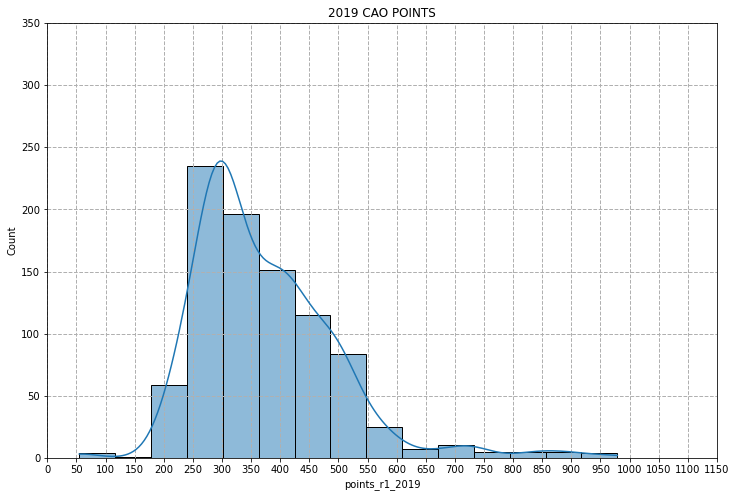

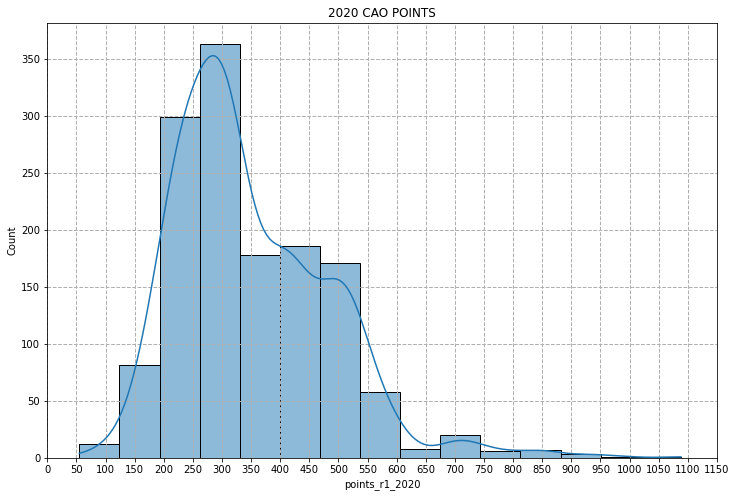

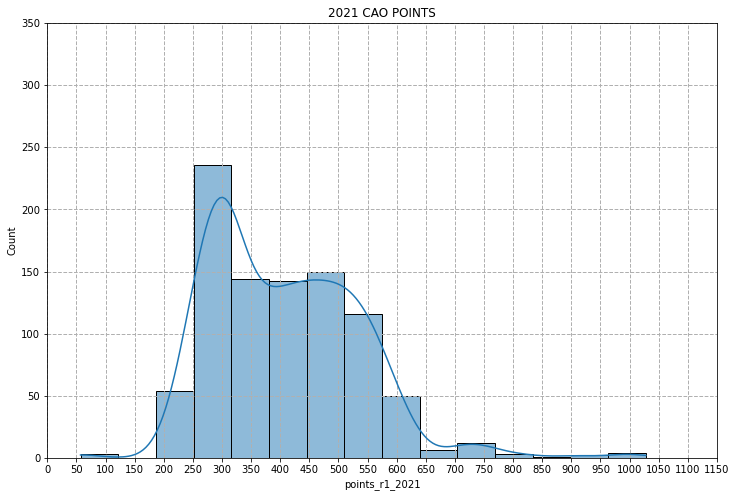

In [153]:
# Plot for 2019
# Plot Size
plt.figure(figsize = (12, 8))

# Adds a grid
plt.grid(True, linestyle='--', linewidth=1)

# Type of plot, kde adds kde lin, bins determins number of bins
sns.histplot(z, kde = True, bins= 15)

# Get or set the current tick locations and labels of the x-axis
plt.xticks(np.arange(0, 1200, step=50))

# Get or set the current tick locations and labels of the y-axis
plt.yticks(np.arange(0, 400, step=50))

# Sets the title of the plot
plt.title('2019 CAO POINTS')


# Plot for 2020
# Plot Size
plt.figure(figsize = (12, 8))

# Adds a grid
plt.grid(True, linestyle='--', linewidth=1)

# Type of plot, kde adds kde lin, bins determins number of bins
sns.histplot(y, kde = True, bins= 15)

# Get or set the current tick locations and labels of the x-axis
plt.xticks(np.arange(0, 1200, step=50))

# Get or set the current tick locations and labels of the y-axis
plt.yticks(np.arange(0, 400, step=50))

# Sets the title of the plot
plt.title('2020 CAO POINTS')

# Plot for 2021
# Plot Size
plt.figure(figsize = (12, 8))

# Adds a grid
plt.grid(True, linestyle='--', linewidth=1)

# Type of plot, kde adds kde lin, bins determins number of bins
sns.histplot(x, kde = True, bins= 15)

# Get or set the current tick locations and labels of the x-axis
plt.xticks(np.arange(0, 1200, step=50))

# Get or set the current tick locations and labels of the y-axis
plt.yticks(np.arange(0, 400, step=50))

# Sets the title of the plot
plt.title('2021 CAO POINTS')


Now as we know the coronavirus (Covid-19) has effected our lives in many ways, and for the students taking the leaving cert exams since 2020 the CAO points system was one of these ways. As we can see in 2019 (pre-covid) the points range where the hightest numbers of courses seemed to fall between was the 240 and 360 range. With the number of courses available peaking at around the 300 point mark and the amount of courses available falling at a pretty consistant rate as the points required went higher. This is pretty much the type of trend I would have expected when I began this project.

In 2020 (during covid) this was much different where the hightest frequencey of courses seemed to fall between was the 190 and 340 range, but what was most evident was the precipitous drop off of at around the 330 points mark. It did not make the gradual decline as it had in 2019. Instead we see a much higher peak around the 300 point mark where the count of courses in the bins between 200 and 340 have a much higher count than in 2019 and 2021. Now I am not sure why this is. I read multiple articles in the [Irish times](https://www.irishtimes.com/leaving-cert-2020-how-the-cao-determines-points-allocations-1.4306898) and [The Journal](thejournal.ie/cao-leaving-cert-points-5201657-Sep2020/) to see if I could figure out how this change in trend was able to happen. There were a number of factors: 
 - Some courses were able to offer more places as the classes were projected to be online so physical classroom space was not an obstacle.
 - The uncertainty surrounding covid, who was grading the subjects and how they were being graded may have influenced how the course points were caluclated.
 - Because there was almost 30% more courses available in 2020 than in 2019 and 2021 there may have been a duplication of the same courses in across many colleges which may have led to places being available in the 190 and 340 points range in 2020. 
 - Because the students own teachers were doing the grading, the points totals were expected to be (and were) record breaking. 
  
In 2021 the graph seems to come more back in line with the 2019 trend - even though there still seems to be a steep drop off around the 330 points mark it was trending more towards the 2019 graph. 
One of the most interesting and topical discussion points surrounding the CAO over this 3 year period was the inflation of the points totals in 2020. We can see this clearly illustrated in the graphs above if we compare the bins between the 350 and 550 points marks.  
We can see that in 2019 the peak count in the bin folling the 350 points mark was a count of just over 150. In 2020 the 3 bins following the 350 points mark all hit at a minimum 160 course count and the bin at the 400 point mark was around a count of 180 - this is far higher than the previous year.

 
Overall it was a tumultuous 3 years for the world in general and the CAO points system was certainly not exempt. 


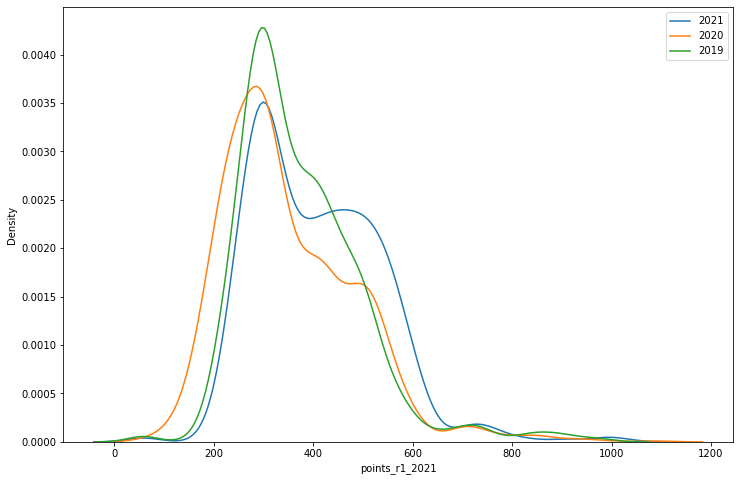

In [151]:
plt.figure(figsize = (12, 8))
sns.kdeplot(x, label = 2021)
sns.kdeplot(y, label = 2020)
sns.kdeplot(z, label = 2019)

plt.legend()

In [ ]:
firstrndpts.tail()

In [ ]:
firstrndpts.tail()

In [ ]:
firstrndpts.to_csv('wih1.csv')

In [ ]:
firstrndpts = firstrndpts.astype({"points_r1_2021": ('int64')})

In [ ]:
firstrndpts = firstrndpts.astype({"points_r1_2021": ('int64'), 
                                              "points_r1_2020": ('int64'),
                                              "points_r1_2019": ('int64')})

### Returning to 2020 points

As I now had the data in the columns I needed I still had one problem I had some spurious characters and strings in the 2020 column - after more research and frustration and trying different methods I decided to do what I normally do when I run into an IT problem at work - I plugged it out and plugged it back in again. So here I decided to export the data I had to CSV, then read it back in again as a new dataframe called 'firstrndpts' and try do my changes again.

In [ ]:
print(list(allcourses.columns))

In [ ]:
# test to ensure points columns are the same types of data - Panda series
for col in list (allcourses.columns):
    print(allcourses[col])
    print('\n')
    print(type(allcourses[col]))

In [ ]:
# create csv file of data frame
allcourses.to_csv('All_Courses_RD1.csv')

In [ ]:
# Read back in data in new data frame
firstrndpts = pd.read_csv('All_Courses_RD1.csv')

In [ ]:
# Take a peak
firstrndpts.head()

In [ ]:
# Remove #+matric, # and AQA from ata frame
firstrndpts['points_r1_2020'] = firstrndpts['points_r1_2020'].str.replace('#+matric', '', regex = False)
firstrndpts['points_r1_2020'] = firstrndpts['points_r1_2020'].str.replace('#', '', regex = False)
firstrndpts['points_r1_2020'] = firstrndpts['points_r1_2020'].str.replace('AQA', '', regex = False)
firstrndpts['points_r1_2019'] = firstrndpts['points_r1_2020'].str.replace('mat', '', regex = False)
firstrndpts['points_r1_2021'] = firstrndpts['points_r1_2020'].str.replace('AQA', '', regex = False)

In [ ]:
# Export the data to a CSV file
firstrndpts.to_csv('wih.csv')

In [ ]:
firstrndpts

This worked perfectly, although I am still unsure why that worked I suspect the data type which I will probably have to address again later on - but time marched on so i didnt dwell on that for the moment.
Now I had all the courses for 2019, 2020 and 2021 with all the points in a clean dataframe.

In [ ]:
# checking the data types
firstrndpts.dtypes

As suspected all the data types were objects - this was going to have to change in the analysis section.

### Analysis

The first thing I have got in to the habit of doing once I have my data together is using the describe function to give see if anything jumped out.

In [ ]:
firstrndpts.describe()

In [ ]:
firstrndpts['points_r1_2021'].describe()

In [ ]:
firstrndpts['points_r1_2020'].describe()

In [ ]:
firstrndpts['points_r1_2019'].describe()

First thing I notice is the most frequent value in both 2021 and 2019 is 300 points this makes sense as for the vast majority of the courses they are working off a 600 point total so if the CAO is grading on a curve 300 would be the average.  
However for 2020 the most frequent value is an empty column and I cannot see the mean for each column - for that I will have to do some more adjustment to the data set.

In [ ]:
firstrndpts

In [ ]:
firstrndpts.fillna(0, inplace=True)

In [ ]:
firstrndpts = firstrndpts.replace('', 0, inplace=True)

In [ ]:
firstrndpts['points_r1_2021'] = np.array(firstrndpts['points_r1_2021'], dtype=np.int64)

In [ ]:
firstrndpts.to_csv('wih.csv')

In [ ]:
firstrndpts = firstrndpts.astype({"points_r1_2021": ('int64'), 
                                              "points_r1_2020": ('int64'),
                                              "points_r1_2019": ('int64')})

## Cleaning up the data


In [ ]:
# Export the data to a CSV file
allcourses.to_csv('All_Courses_Check.csv')